In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [11]:
X_train  = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\train_X.csv",delimiter=',').T
y_train = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\train_label.csv",delimiter=',').T

X_test = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\test_X.csv",delimiter=',').T
y_test = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\test_label.csv",delimiter=',').T

In [12]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (784, 1000)
Shape of y_train (10, 1000)
Shape of X_test (784, 350)
Shape of y_test (10, 350)


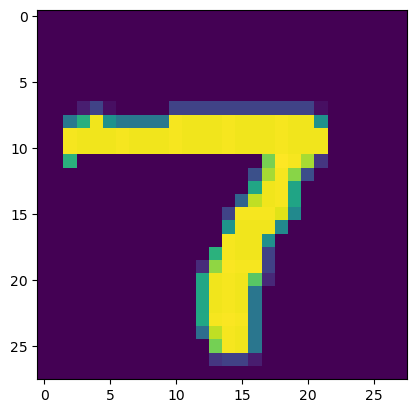

In [13]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28))

# Model

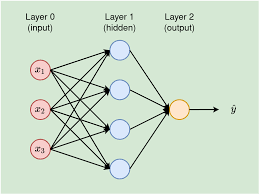

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


In [5]:
##Activation Function

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX,axis=0)

def sigmoid(x):
    exp_neg_x = math.exp(-x)
    return 1/(1+exp_neg_x)

In [6]:
## Derivatives of Activation Function

def der_tanh(x):
    return (1-np.power(np.tanh(x),2))

def der_relu(x):
    return np.array(x>0,dtype=np.float32)

## Initialize_parameters

In [14]:
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x)*0.001
    b1 = np.zeros((n_h,1))
    
    w2 = np.random.randn(n_y,n_h)*0.001
    b2 = np.zeros((n_y,1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Forward Propagation

In [15]:
def forward_propagation(x,parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1,x) + b1
    a1 = relu(z1)
#     a1 = tanh(z1)
    
    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

In [9]:
def cost_function(a2,y): #y is actual label
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2,0),1))
    
    return cost

In [16]:
def backward_propagation(x,y,parameters,forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2-y)
    dw2 = (1/m)*np.dot(dz2,a1.T)
    db2 = (1/m)*np.sum(dz2,axis = 1,keepdims=True)
    
    dz1 = (1/m)*np.dot(w2.T,dz2)*der_relu(a1)
    dw1 = (1/m)*np.dot(dz1,x.T)
    db1 = (1/m)*np.sum(dz1,axis = 1,keepdims=True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

## Update Parameters

In [17]:
def update_parameters(parameters,gradients,learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Complete Model

In [18]:
def model(x,y,n_h,learning_rate,iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x,parameters)
        
        cost = cost_function(forward_cache['a2'],y)
        
        gradients = backward_propagation(x,y,parameters,forward_cache)
        
        parameters = update_parameters(parameters,gradients,learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10)==0):
            print("Cost after",i,"iterations is :", cost)
        
    return parameters,cost_list

In [19]:
iterations = 500
n_h = 1000
learning_rate = 0.01
Parameters, Cost_list = model(X_train,y_train,n_h=n_h,learning_rate = learning_rate,iterations=iterations)

Cost after 0 iterations is : 2.3050624721503277
Cost after 50 iterations is : 0.46344134584277535
Cost after 100 iterations is : 0.3017267926080095
Cost after 150 iterations is : 0.22487165084736532
Cost after 200 iterations is : 0.17624868216028927
Cost after 250 iterations is : 0.14189934080936575
Cost after 300 iterations is : 0.11638103181231015
Cost after 350 iterations is : 0.09697479239734653
Cost after 400 iterations is : 0.08196533716852088
Cost after 450 iterations is : 0.07021624391771517


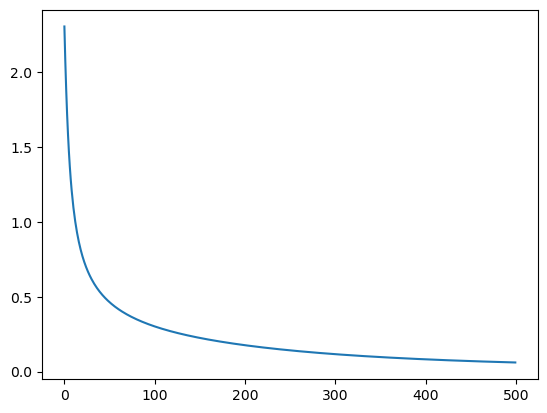

In [20]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [21]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [22]:
print("Accuracy of Train Dataset", accuracy(X_train, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.9 %
Accuracy of Test Dataset 86.86 %


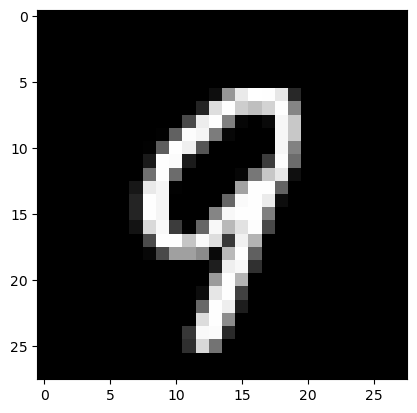

Our model says it is : 9


In [26]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])